## Exercise 03 : Bar charts

In [36]:
import pandas as pd
import sqlite3
con=sqlite3.connect('../data/checking-logs.sqlite')
main_query = """
WITH commits AS (
    SELECT 
        CASE 
            WHEN strftime('%w', timestamp) IN ('0','6') THEN 'weekend'
            ELSE 'working_day'
        END AS day_type,
        CAST(strftime('%H', timestamp) AS INTEGER) AS hour,
        DATE(timestamp) AS date,
        COUNT(*) AS commits_num
    FROM checker
    WHERE uid LIKE 'user_%'
    GROUP BY day_type, date, hour
)
SELECT 
    day_type,
    hour,
    AVG(commits_num) AS avg_commits
FROM commits
GROUP BY day_type, hour
ORDER BY day_type, hour;
"""
df=pd.read_sql(main_query, con)
df

,day_type,hour,avg_commits
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


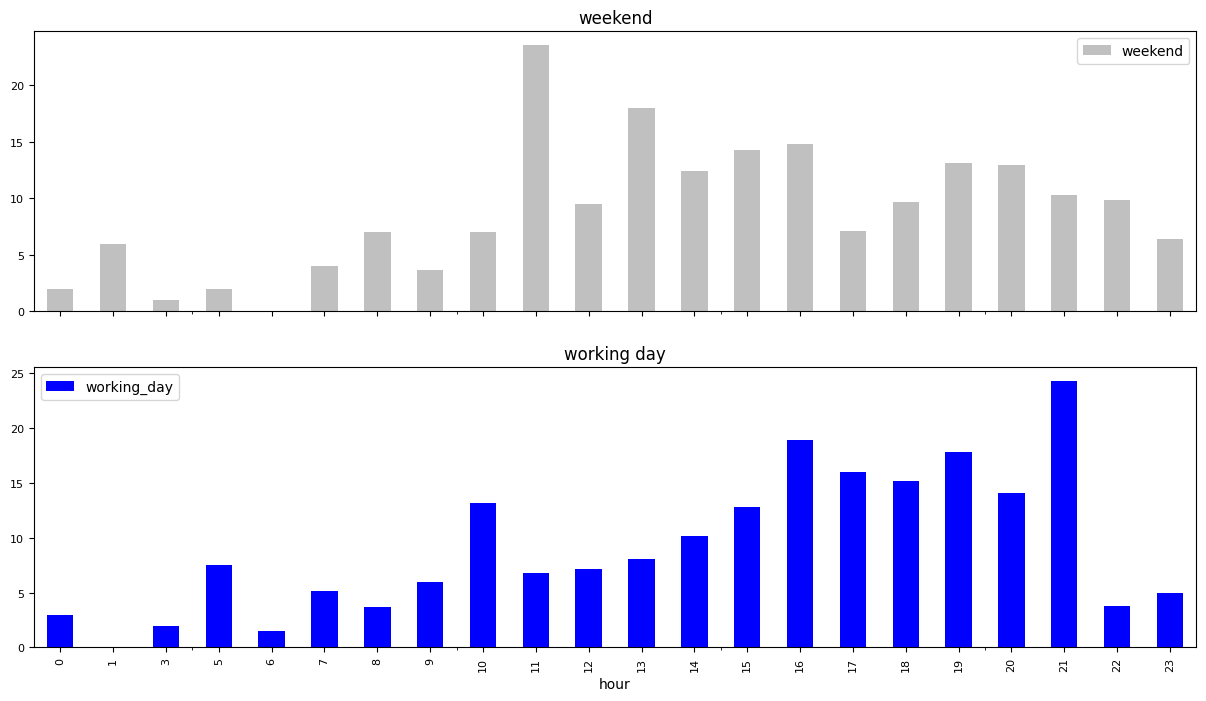

In [ ]:
df_pivot=df.pivot_table(index='hour', columns='day_type', values='avg_commits')
df_plot=df_pivot.plot(
    fontsize=8,
    figsize=(15,8),
    kind='bar',
    subplots=True,
    sharex=True,
    legend=False,
    color=['silver', 'blue']
)
df_plot[0].set_title('weekend')
df_plot[0].legend(loc='upper left')
df_plot[1].set_title('working day')
df_plot[1].legend()

In [38]:
df

,day_type,hour,avg_commits
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [37]:
con.close()

Is the dynamic different on working days and weekends?”, 
11, 21
